## Menentukan Pertanyaan Bisnis

# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Anggun Sulis Setyawan
- **Email:** Sul191120@gmail.com
- **ID Dicoding:** sulbae

1. Bagaimana Trend Kondisi Kualitas Udara Beberapa Wilayah di China Pada Tahun 2014 - 2016?
2. Wilayah mana yang memiliki udara paling tercemar (terdapat polutan dengan rata-rata tertinggi) sepanjang tahun 2015?

## Import Semua Packages/Library yang Digunakan

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import BytesIO
import zipfile
import glob

### Gathering Data

## Data Wrangling

### Baca file ZIP ke dalam objek BytesIO

In [280]:
url = "https://github.com/Sulbae/Air-Quality-Analysis/raw/main/Dataset/PRSA_Data_20130301-20170228.zip"
response = requests.get(url)

### Mengekstrak file zip

In [281]:
file = zipfile.ZipFile(BytesIO(response.content))
file.extractall()

### Membuat dictionary dari list file data csv

In [282]:
list_file_csv = glob.glob("*.csv")
all_files = {}

print("Dictionary file csv:")
for idx, file_csv in enumerate(list_file_csv):
  var_name = f"data{idx + 1}_df"
  all_files[var_name] = file_csv
  print(f"{var_name}: {file_csv}")

print("\n all_files: \n", all_files)

Dictionary file csv:
data1_df: PRSA_Data_Wanshouxigong_20130301-20170228.csv
data2_df: PRSA_Data_Tiantan_20130301-20170228.csv
data3_df: PRSA_Data_Nongzhanguan_20130301-20170228.csv
data4_df: PRSA_Data_Dongsi_20130301-20170228.csv
data5_df: PRSA_Data_Shunyi_20130301-20170228.csv
data6_df: PRSA_Data_Changping_20130301-20170228.csv
data7_df: PRSA_Data_Huairou_20130301-20170228.csv
data8_df: PRSA_Data_Dingling_20130301-20170228.csv
data9_df: PRSA_Data_Guanyuan_20130301-20170228.csv
data10_df: PRSA_Data_Gucheng_20130301-20170228.csv
data11_df: PRSA_Data_Aotizhongxin_20130301-20170228.csv
data12_df: PRSA_Data_Wanliu_20130301-20170228.csv

 all_files: 
 {'data1_df': 'PRSA_Data_Wanshouxigong_20130301-20170228.csv', 'data2_df': 'PRSA_Data_Tiantan_20130301-20170228.csv', 'data3_df': 'PRSA_Data_Nongzhanguan_20130301-20170228.csv', 'data4_df': 'PRSA_Data_Dongsi_20130301-20170228.csv', 'data5_df': 'PRSA_Data_Shunyi_20130301-20170228.csv', 'data6_df': 'PRSA_Data_Changping_20130301-20170228.csv', 'd

### Mengubah menjadi variabel dataframe


In [283]:
for key, value in all_files.items():
  df = pd.read_csv(value)
  globals()[key] = df

In [284]:
all_files

{'data1_df': 'PRSA_Data_Wanshouxigong_20130301-20170228.csv',
 'data2_df': 'PRSA_Data_Tiantan_20130301-20170228.csv',
 'data3_df': 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'data4_df': 'PRSA_Data_Dongsi_20130301-20170228.csv',
 'data5_df': 'PRSA_Data_Shunyi_20130301-20170228.csv',
 'data6_df': 'PRSA_Data_Changping_20130301-20170228.csv',
 'data7_df': 'PRSA_Data_Huairou_20130301-20170228.csv',
 'data8_df': 'PRSA_Data_Dingling_20130301-20170228.csv',
 'data9_df': 'PRSA_Data_Guanyuan_20130301-20170228.csv',
 'data10_df': 'PRSA_Data_Gucheng_20130301-20170228.csv',
 'data11_df': 'PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 'data12_df': 'PRSA_Data_Wanliu_20130301-20170228.csv'}

### Tampilkan dataframe

In [285]:
data1_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


In [286]:
data2_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [287]:
data3_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [288]:
data4_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [289]:
data5_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [290]:
data6_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [291]:
data7_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [292]:
data8_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [293]:
data9_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [294]:
data10_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [295]:
data11_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [296]:
data12_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


### Assessing Data

### data1_df

In [297]:
data1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [298]:
print("Jumlah duplikasi:", data1_df.duplicated().sum())

Jumlah duplikasi: 0


In [299]:
print("Jumlah missing value:", data1_df.isna().sum())

Jumlah missing value: No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64


In [300]:
data1_df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,35064.0,17532.500000,10122.249256,1.0000,8766.75,17532.5,26298.25,35064.0
year,35064.0,2014.662560,1.177213,2013.0000,2014.00,2015.0,2016.00,2017.0
month,35064.0,6.522930,3.448752,1.0000,4.00,7.0,10.00,12.0
day,35064.0,15.729637,8.800218,1.0000,8.00,16.0,23.00,31.0
hour,35064.0,11.500000,6.922285,0.0000,5.75,11.5,17.25,23.0
PM2.5,34368.0,85.024136,85.975981,3.0000,23.00,60.0,116.00,999.0
PM10,34580.0,112.223459,97.593210,2.0000,39.00,91.0,154.00,961.0
SO2,34395.0,17.148603,23.940834,0.2856,3.00,8.0,21.00,411.0
NO2,34310.0,55.529560,35.808050,2.0000,28.00,49.0,77.00,251.0
CO,33767.0,1370.395031,1223.139114,100.0000,600.00,1000.0,1700.00,9800.0


### data2_df

In [301]:
data2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [302]:
print("Jumlah duplikasi:", data2_df.duplicated().sum())

Jumlah duplikasi: 0


In [303]:
print("Jumlah missing value:", data2_df.isna().sum())

Jumlah missing value: No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64


In [304]:
data2_df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,35064.0,17532.500000,10122.249256,1.0000,8766.75,17532.5,26298.25,35064.0
year,35064.0,2014.662560,1.177213,2013.0000,2014.00,2015.0,2016.00,2017.0
month,35064.0,6.522930,3.448752,1.0000,4.00,7.0,10.00,12.0
day,35064.0,15.729637,8.800218,1.0000,8.00,16.0,23.00,31.0
hour,35064.0,11.500000,6.922285,0.0000,5.75,11.5,17.25,23.0
PM2.5,34387.0,82.164911,80.921384,3.0000,22.00,59.0,113.00,821.0
PM10,34467.0,106.363672,89.700157,2.0000,41.00,85.0,144.00,988.0
SO2,33946.0,14.367615,20.144631,0.5712,3.00,7.0,17.00,273.0
NO2,34320.0,53.162646,31.946224,2.0000,28.00,47.0,71.00,241.0
CO,33938.0,1298.303318,1170.593297,100.0000,500.00,900.0,1600.00,10000.0


### data3_df

In [305]:
data3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [306]:
print("Jumlah duplikasi:", data3_df.duplicated().sum())

Jumlah duplikasi: 0


In [307]:
print("Jumlah missing value:", data3_df.isna().sum())

Jumlah missing value: No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64


In [308]:
data3_df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,35064.0,17532.500000,10122.249256,1.0000,8766.75,17532.5,26298.25,35064.0
year,35064.0,2014.662560,1.177213,2013.0000,2014.00,2015.0,2016.00,2017.0
month,35064.0,6.522930,3.448752,1.0000,4.00,7.0,10.00,12.0
day,35064.0,15.729637,8.800218,1.0000,8.00,16.0,23.00,31.0
hour,35064.0,11.500000,6.922285,0.0000,5.75,11.5,17.25,23.0
PM2.5,34436.0,84.838483,86.225344,2.0000,22.00,59.0,116.00,844.0
PM10,34624.0,108.991096,95.341177,2.0000,38.00,85.0,149.00,995.0
SO2,34618.0,18.689242,24.280665,0.5712,3.00,9.0,23.00,257.0
NO2,34372.0,58.097172,36.297740,2.0000,29.00,51.0,80.00,273.0
CO,33858.0,1324.350198,1245.166124,100.0000,500.00,900.0,1600.00,10000.0


### data4_df

In [309]:
data4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [310]:
print("Jumlah duplikasi:", data4_df.duplicated().sum())

Jumlah duplikasi: 0


In [311]:
print("Jumlah missing value:", data4_df.isna().sum())

Jumlah missing value: No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64


In [312]:
data4_df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,35064.0,17532.500000,10122.249256,1.0000,8766.75,17532.5000,26298.25,35064.0
year,35064.0,2014.662560,1.177213,2013.0000,2014.00,2015.0000,2016.00,2017.0
month,35064.0,6.522930,3.448752,1.0000,4.00,7.0000,10.00,12.0
day,35064.0,15.729637,8.800218,1.0000,8.00,16.0000,23.00,31.0
hour,35064.0,11.500000,6.922285,0.0000,5.75,11.5000,17.25,23.0
PM2.5,34314.0,86.194297,86.575127,3.0000,22.00,61.0000,119.00,737.0
PM10,34511.0,110.336742,98.219860,2.0000,38.00,86.0000,151.00,955.0
SO2,34401.0,18.531107,22.905655,0.2856,4.00,10.0000,24.00,300.0
NO2,33463.0,53.699443,33.959230,2.0000,27.00,47.0000,73.00,258.0
CO,31867.0,1330.069131,1191.305887,100.0000,600.00,1000.0000,1700.00,10000.0


### data5_df

In [313]:
data5_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [314]:
print("Jumlah duplikasi:", data5_df.duplicated().sum())

Jumlah duplikasi: 0


In [315]:
print("Jumlah missing value:", data5_df.isna().sum())

Jumlah missing value: No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64


In [316]:
data5_df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,35064.0,17532.500000,10122.249256,1.0000,8766.75,17532.5,26298.25,35064.0000
year,35064.0,2014.662560,1.177213,2013.0000,2014.00,2015.0,2016.00,2017.0000
month,35064.0,6.522930,3.448752,1.0000,4.00,7.0,10.00,12.0000
day,35064.0,15.729637,8.800218,1.0000,8.00,16.0,23.00,31.0000
hour,35064.0,11.500000,6.922285,0.0000,5.75,11.5,17.25,23.0000
PM2.5,34151.0,79.491602,81.231739,2.0000,19.00,55.0,112.00,941.0000
PM10,34516.0,98.737026,89.143718,2.0000,31.00,77.0,138.00,999.0000
SO2,33768.0,13.572039,19.572068,0.2856,2.00,5.0,17.00,239.0000
NO2,33699.0,43.908865,30.996828,2.0000,19.00,37.0,62.00,258.0000
CO,32886.0,1187.063979,1156.374102,100.0000,400.00,800.0,1500.00,10000.0000


### data6_df

In [317]:
data6_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [318]:
print("Jumlah duplikasi:", data6_df.duplicated().sum())

Jumlah duplikasi: 0


In [319]:
print("Jumlah missing value:", data6_df.isna().sum())

Jumlah missing value: No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64


In [320]:
data6_df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,35064.0,17532.500000,10122.249256,1.0000,8766.7500,17532.5,26298.2500,35064.0
year,35064.0,2014.662560,1.177213,2013.0000,2014.0000,2015.0,2016.0000,2017.0
month,35064.0,6.522930,3.448752,1.0000,4.0000,7.0,10.0000,12.0
day,35064.0,15.729637,8.800218,1.0000,8.0000,16.0,23.0000,31.0
hour,35064.0,11.500000,6.922285,0.0000,5.7500,11.5,17.2500,23.0
PM2.5,34290.0,71.099743,72.326926,2.0000,18.0000,46.0,100.0000,882.0
PM10,34482.0,94.657871,83.441738,2.0000,34.0000,72.0,131.0000,999.0
SO2,34436.0,14.958906,20.975331,0.2856,2.0000,7.0,18.0000,310.0
NO2,34397.0,44.182086,29.519796,1.8477,22.0000,36.0,60.3582,226.0
CO,33543.0,1152.301345,1103.056282,100.0000,500.0000,800.0,1400.0000,10000.0


### data7_df

In [321]:
data7_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [322]:
print("Jumlah duplikasi:", data7_df.duplicated().sum())

Jumlah duplikasi: 0


In [323]:
print("Jumlah missing value:", data7_df.isna().sum())

Jumlah missing value: No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64


In [324]:
data7_df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,35064.0,17532.500000,10122.249256,1.0000,8766.75,17532.5,26298.25,35064.0
year,35064.0,2014.662560,1.177213,2013.0000,2014.00,2015.0,2016.00,2017.0
month,35064.0,6.522930,3.448752,1.0000,4.00,7.0,10.00,12.0
day,35064.0,15.729637,8.800218,1.0000,8.00,16.0,23.00,31.0
hour,35064.0,11.500000,6.922285,0.0000,5.75,11.5,17.25,23.0
PM2.5,34111.0,69.626367,71.224916,2.0000,17.00,47.0,98.00,762.0
PM10,34287.0,91.482690,83.289578,2.0000,28.00,69.0,131.00,993.0
SO2,34084.0,12.121553,18.896912,0.2856,2.00,4.0,14.00,315.0
NO2,33425.0,32.497250,26.489531,1.0265,12.00,25.0,46.00,231.0
CO,33642.0,1022.554545,898.738241,100.0000,400.00,800.0,1300.00,10000.0


### data8_df

In [325]:
data8_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [326]:
print("Jumlah duplikasi:", data8_df.duplicated().sum())

Jumlah duplikasi: 0


In [327]:
print("Jumlah missing value:", data8_df.isna().sum())

Jumlah missing value: No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64


In [328]:
data8_df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,35064.0,17532.500000,10122.249256,1.0000,8766.75,17532.5,26298.25,35064.0
year,35064.0,2014.662560,1.177213,2013.0000,2014.00,2015.0,2016.00,2017.0
month,35064.0,6.522930,3.448752,1.0000,4.00,7.0,10.00,12.0
day,35064.0,15.729637,8.800218,1.0000,8.00,16.0,23.00,31.0
hour,35064.0,11.500000,6.922285,0.0000,5.75,11.5,17.25,23.0
PM2.5,34285.0,65.989497,72.267723,3.0000,14.00,41.0,93.00,881.0
PM10,34408.0,83.739723,79.541685,2.0000,26.00,60.0,117.00,905.0
SO2,34334.0,11.749650,15.519259,0.2856,2.00,5.0,15.00,156.0
NO2,33830.0,27.585467,26.383882,1.0265,9.00,19.0,38.00,205.0
CO,33052.0,904.896073,903.306220,100.0000,300.00,600.0,1200.00,10000.0


### data9_df

In [329]:
data9_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [330]:
print("Jumlah duplikasi:", data9_df.duplicated().sum())

Jumlah duplikasi: 0


In [331]:
print("Jumlah missing value:", data9_df.isna().sum())

Jumlah missing value: No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


In [332]:
data9_df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,35064.0,17532.500000,10122.249256,1.0000,8766.75,17532.5,26298.25,35064.0
year,35064.0,2014.662560,1.177213,2013.0000,2014.00,2015.0,2016.00,2017.0
month,35064.0,6.522930,3.448752,1.0000,4.00,7.0,10.00,12.0
day,35064.0,15.729637,8.800218,1.0000,8.00,16.0,23.00,31.0
hour,35064.0,11.500000,6.922285,0.0000,5.75,11.5,17.25,23.0
PM2.5,34448.0,82.933372,80.933497,2.0000,23.00,59.0,115.00,680.0
PM10,34635.0,109.023303,91.573709,2.0000,40.00,89.0,149.00,999.0
SO2,34590.0,17.590941,23.600367,1.0000,3.00,8.0,22.00,293.0
NO2,34405.0,57.901643,35.150857,2.0000,31.00,51.0,78.00,270.0
CO,33311.0,1271.294377,1164.854945,100.0000,500.00,900.0,1600.00,10000.0


### data10_df

In [333]:
data10_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [334]:
print("Jumlah duplikasi:", data10_df.duplicated().sum())

Jumlah duplikasi: 0


In [335]:
print("Jumlah missing value:", data10_df.isna().sum())

Jumlah missing value: No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64


In [336]:
data10_df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,35064.0,17532.500000,10122.249256,1.0000,8766.75,17532.5,26298.25,35064.0
year,35064.0,2014.662560,1.177213,2013.0000,2014.00,2015.0,2016.00,2017.0
month,35064.0,6.522930,3.448752,1.0000,4.00,7.0,10.00,12.0
day,35064.0,15.729637,8.800218,1.0000,8.00,16.0,23.00,31.0
hour,35064.0,11.500000,6.922285,0.0000,5.75,11.5,17.25,23.0
PM2.5,34418.0,83.852089,82.796445,2.0000,24.00,60.0,115.75,770.0
PM10,34683.0,118.861978,96.742626,2.0000,45.00,99.0,167.00,994.0
SO2,34557.0,15.366162,21.204526,0.2856,2.00,7.0,20.00,500.0
NO2,34396.0,55.871075,36.473860,2.0000,26.00,50.0,79.00,276.0
CO,33663.0,1323.974423,1208.957772,100.0000,600.00,900.0,1600.00,10000.0


### data11_df

In [337]:
data11_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [338]:
print("Jumlah duplikasi:", data11_df.duplicated().sum())

Jumlah duplikasi: 0


In [339]:
print("Jumlah missing value:", data11_df.isna().sum())

Jumlah missing value: No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


In [340]:
data11_df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,35064.0,17532.500000,10122.249256,1.0000,8766.75,17532.5,26298.25,35064.0
year,35064.0,2014.662560,1.177213,2013.0000,2014.00,2015.0,2016.00,2017.0
month,35064.0,6.522930,3.448752,1.0000,4.00,7.0,10.00,12.0
day,35064.0,15.729637,8.800218,1.0000,8.00,16.0,23.00,31.0
hour,35064.0,11.500000,6.922285,0.0000,5.75,11.5,17.25,23.0
PM2.5,34139.0,82.773611,82.135694,3.0000,22.00,58.0,114.00,898.0
PM10,34346.0,110.060391,95.223005,2.0000,38.00,87.0,155.00,984.0
SO2,34129.0,17.375901,22.823017,0.2856,3.00,9.0,21.00,341.0
NO2,34041.0,59.305833,37.116200,2.0000,30.00,53.0,82.00,290.0
CO,33288.0,1262.945145,1221.436236,100.0000,500.00,900.0,1500.00,10000.0


### data12_df

In [341]:
data12_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [342]:
print("Jumlah duplikasi:", data12_df.duplicated().sum())

Jumlah duplikasi: 0


In [343]:
print("Jumlah missing value:", data12_df.isna().sum())

Jumlah missing value: No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64


In [344]:
data12_df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,35064.0,17532.500000,10122.249256,1.0000,8766.75,17532.5,26298.25,35064.0
year,35064.0,2014.662560,1.177213,2013.0000,2014.00,2015.0,2016.00,2017.0
month,35064.0,6.522930,3.448752,1.0000,4.00,7.0,10.00,12.0
day,35064.0,15.729637,8.800218,1.0000,8.00,16.0,23.00,31.0
hour,35064.0,11.500000,6.922285,0.0000,5.75,11.5,17.25,23.0
PM2.5,34682.0,83.374716,81.905568,2.0000,23.00,59.0,116.00,957.0
PM10,34780.0,110.464618,92.795065,2.0000,40.00,88.0,153.00,951.0
SO2,34489.0,18.376481,22.609648,0.2856,4.00,10.0,23.00,282.0
NO2,33994.0,65.258789,37.996088,1.6424,36.00,60.0,88.00,264.0
CO,33252.0,1319.353513,1268.114331,100.0000,500.00,900.0,1600.00,10000.0


### **Findings Summary**:
- Terdapat missing value di setiap table
- Tidak ditemukan duplikasi sehingga apabila tidak ada data null, jumlah setiap baris akan sama

### Cleaning Data

### Mengisi missing value dengan nilai rata-rata

### data1_df

In [345]:
for column in data1_df.columns:
  if data1_df[column].isnull().any():
    if data1_df[column].dtype in ["int64", "float64"]:
      mean_fill = data1_df[column].mean()
      data1_df.fillna(mean_fill, inplace=True)
    else:
      mode_fill = data1_df[column].mode()[0]
      data1_df[column].fillna(mode_fill, inplace=True)


print("Jumlah missing value:", data1_df.isna().sum().sum())

Jumlah missing value: 0


### data2_df

In [346]:
for column in data2_df.columns:
  if data2_df[column].isnull().any():
    if data2_df[column].dtype in ["int64", "float64"]:
      mean_fill = data2_df[column].mean()
      data2_df.fillna(mean_fill, inplace=True)
    else:
      mode_fill = data2_df[column].mode()[0]
      data2_df[column].fillna(mode_fill, inplace=True)


print("Jumlah missing value:", data2_df.isna().sum().sum())

Jumlah missing value: 0


### data3_df

In [347]:
for column in data3_df.columns:
  if data3_df[column].isnull().any():
    if data3_df[column].dtype in ["int64", "float64"]:
      mean_fill = data3_df[column].mean()
      data3_df.fillna(mean_fill, inplace=True)
    else:
      mode_fill = data3_df[column].mode()[0]
      data3_df[column].fillna(mode_fill, inplace=True)


print("Jumlah missing value:", data3_df.isna().sum().sum())

Jumlah missing value: 0


### data4_df

In [348]:
for column in data4_df.columns:
  if data4_df[column].isnull().any():
    if data4_df[column].dtype in ["int64", "float64"]:
      mean_fill = data4_df[column].mean()
      data4_df.fillna(mean_fill, inplace=True)
    else:
      mode_fill = data4_df[column].mode()[0]
      data4_df[column].fillna(mode_fill, inplace=True)


print("Jumlah missing value:", data4_df.isna().sum().sum())

Jumlah missing value: 0


### data5_df

In [349]:
for column in data5_df.columns:
  if data5_df[column].isnull().any():
    if data5_df[column].dtype in ["int64", "float64"]:
      mean_fill = data5_df[column].mean()
      data5_df.fillna(mean_fill, inplace=True)
    else:
      mode_fill = data5_df[column].mode()[0]
      data5_df[column].fillna(mode_fill, inplace=True)


print("Jumlah missing value:", data5_df.isna().sum().sum())

Jumlah missing value: 0


### data6_df

In [350]:
for column in data6_df.columns:
  if data6_df[column].isnull().any():
    if data6_df[column].dtype in ["int64", "float64"]:
      mean_fill = data6_df[column].mean()
      data6_df.fillna(mean_fill, inplace=True)
    else:
      mode_fill = data6_df[column].mode()[0]
      data6_df[column].fillna(mode_fill, inplace=True)


print("Jumlah missing value:", data6_df.isna().sum().sum())

Jumlah missing value: 0


### data7_df

In [351]:
for column in data7_df.columns:
  if data7_df[column].isnull().any():
    if data7_df[column].dtype in ["int64", "float64"]:
      mean_fill = data7_df[column].mean()
      data7_df.fillna(mean_fill, inplace=True)
    else:
      mode_fill = data7_df[column].mode()[0]
      data7_df[column].fillna(mode_fill, inplace=True)


print("Jumlah missing value:", data7_df.isna().sum().sum())

Jumlah missing value: 0


### data8_df

In [352]:
for column in data8_df.columns:
  if data8_df[column].isnull().any():
    if data8_df[column].dtype in ["int64", "float64"]:
      mean_fill = data8_df[column].mean()
      data8_df.fillna(mean_fill, inplace=True)
    else:
      mode_fill = data8_df[column].mode()[0]
      data8_df[column].fillna(mode_fill, inplace=True)


print("Jumlah missing value:", data8_df.isna().sum().sum())

Jumlah missing value: 0


### data9_df

In [353]:
for column in data9_df.columns:
  if data9_df[column].isnull().any():
    if data9_df[column].dtype in ["int64", "float64"]:
      mean_fill = data9_df[column].mean()
      data9_df.fillna(mean_fill, inplace=True)
    else:
      mode_fill = data9_df[column].mode()[0]
      data9_df[column].fillna(mode_fill, inplace=True)


print("Jumlah missing value:", data9_df.isna().sum().sum())

Jumlah missing value: 0


### data10_df

In [354]:
for column in data10_df.columns:
  if data10_df[column].isnull().any():
    if data10_df[column].dtype in ["int64", "float64"]:
      mean_fill = data10_df[column].mean()
      data10_df.fillna(mean_fill, inplace=True)
    else:
      mode_fill = data10_df[column].mode()[0]
      data10_df[column].fillna(mode_fill, inplace=True)


print("Jumlah missing value:", data10_df.isna().sum().sum())

Jumlah missing value: 0


### data11_df

In [355]:
for column in data11_df.columns:
  if data11_df[column].isnull().any():
    if data11_df[column].dtype in ["int64", "float64"]:
      mean_fill = data11_df[column].mean()
      data11_df.fillna(mean_fill, inplace=True)
    else:
      mode_fill = data4_df[column].mode()[0]
      data11_df[column].fillna(mode_fill, inplace=True)


print("Jumlah missing value:", data11_df.isna().sum().sum())

Jumlah missing value: 0


### data12_df

In [356]:
for column in data12_df.columns:
  if data12_df[column].isnull().any():
    if data12_df[column].dtype in ["int64", "float64"]:
      mean_fill = data12_df[column].mean()
      data12_df.fillna(mean_fill, inplace=True)
    else:
      mode_fill = data12_df[column].mode()[0]
      data12_df[column].fillna(mode_fill, inplace=True)


print("Jumlah missing value:", data12_df.isna().sum().sum())

Jumlah missing value: 0


## Exploratory Data Analysis (EDA)

### Gabungkan data

In [357]:
tables = [data1_df, data2_df, data3_df, data4_df, data5_df,
          data6_df, data7_df, data8_df, data9_df, data10_df,
          data11_df, data12_df]

combined_table = pd.DataFrame()

for table in tables:
  combined_table = pd.concat([combined_table, table], ignore_index=True)

combined_table = combined_table.drop(columns="No")
combined_table.insert(0, "No" ,range(1, len(combined_table) + 1))
combined_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


- Temuan:
  1. Tipe data pada kolom __*year*__, __*month*__, __*day*__, __*hour*__ masih bertipe __int64__;
  2. Dan sebaiknya digabungkan menjadi satu kolom __*datetime*__

### Membuat kolom datetime

In [358]:
combined_table["datetime"] = pd.to_datetime(combined_table[["year", "month", "day", "hour"]])

combined_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        420768 non-null  int64         
 1   year      420768 non-null  int64         
 2   month     420768 non-null  int64         
 3   day       420768 non-null  int64         
 4   hour      420768 non-null  int64         
 5   PM2.5     420768 non-null  float64       
 6   PM10      420768 non-null  float64       
 7   SO2       420768 non-null  float64       
 8   NO2       420768 non-null  float64       
 9   CO        420768 non-null  float64       
 10  O3        420768 non-null  float64       
 11  TEMP      420768 non-null  float64       
 12  PRES      420768 non-null  float64       
 13  DEWP      420768 non-null  float64       
 14  RAIN      420768 non-null  float64       
 15  wd        420768 non-null  object        
 16  WSPM      420768 non-null  float64    

### Explore ...

In [359]:
combined_table

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,9.0,9.0,6.000000,17.000000,200.000000,62.000000,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong,2013-03-01 00:00:00
1,2,2013,3,1,1,11.0,11.0,7.000000,14.000000,200.000000,66.000000,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong,2013-03-01 01:00:00
2,3,2013,3,1,2,8.0,8.0,85.024136,16.000000,200.000000,59.000000,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong,2013-03-01 02:00:00
3,4,2013,3,1,3,8.0,8.0,3.000000,16.000000,85.024136,85.024136,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong,2013-03-01 03:00:00
4,5,2013,3,1,4,8.0,8.0,3.000000,85.024136,300.000000,36.000000,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,420764,2017,2,28,19,11.0,27.0,4.000000,20.000000,300.000000,81.000000,12.6,1011.9,-14.3,0.0,N,2.0,Wanliu,2017-02-28 19:00:00
420764,420765,2017,2,28,20,15.0,43.0,6.000000,55.000000,500.000000,45.000000,9.4,1012.3,-11.9,0.0,WSW,1.0,Wanliu,2017-02-28 20:00:00
420765,420766,2017,2,28,21,13.0,35.0,7.000000,48.000000,500.000000,48.000000,8.7,1012.8,-13.7,0.0,N,1.1,Wanliu,2017-02-28 21:00:00
420766,420767,2017,2,28,22,12.0,31.0,5.000000,47.000000,500.000000,50.000000,7.8,1012.9,-12.6,0.0,NNE,1.0,Wanliu,2017-02-28 22:00:00


In [360]:
combined_table.describe(include="all").T

<ipython-input-360-0017ece910fb>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  combined_table.describe(include="all").T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
No,420768.0,NaN,NaN,NaN,NaT,NaT,210384.5,121465.403371,1.0,105192.75,210384.5,315576.25,420768.0
year,420768.0,NaN,NaN,NaN,NaT,NaT,2014.66256,1.177198,2013.0,2014.0,2015.0,2016.0,2017.0
month,420768.0,NaN,NaN,NaN,NaT,NaT,6.52293,3.448707,1.0,4.0,7.0,10.0,12.0
day,420768.0,NaN,NaN,NaN,NaT,NaT,15.729637,8.800102,1.0,8.0,16.0,23.0,31.0
hour,420768.0,NaN,NaN,NaN,NaT,NaT,11.5,6.922195,0.0,5.75,11.5,17.25,23.0
PM2.5,420768.0,NaN,NaN,NaN,NaT,NaT,79.780235,79.984694,2.0,21.0,57.0,109.0,999.0
PM10,420768.0,NaN,NaN,NaN,NaT,NaT,104.207108,91.125678,2.0,36.0,82.0,144.0,999.0
SO2,420768.0,NaN,NaN,NaN,NaT,NaT,17.190614,23.323587,0.2856,3.0,8.0,21.0,500.0
NO2,420768.0,NaN,NaN,NaN,NaT,NaT,51.457184,34.963672,1.0265,24.0,45.0,73.0,290.0
CO,420768.0,NaN,NaN,NaN,NaT,NaT,1174.147536,1158.342601,65.989497,400.0,800.0,1500.0,10000.0


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Trend Kondisi Kualitas Udara Beberapa Wilayah di China Pada Tahun 2014 - 2016?

In [361]:
monthly_data = combined_table.resample(rule="M", on="datetime").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
})

monthly_data.index = monthly_data.index.strftime("%Y-%m")
monthly_data = monthly_data.reset_index()

monthly_data = monthly_data.groupby(by="datetime").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
}).reset_index()

viz_monthly_data = monthly_data.loc[(monthly_data["datetime"] >= "2014-01") & (monthly_data["datetime"] <= "2016-12")]
viz_monthly_data = viz_monthly_data.round(decimals=2)
viz_monthly_data

,datetime,PM2.5,PM10,SO2,NO2
10,2014-01,97.64,122.32,53.92,68.33
11,2014-02,145.36,148.47,58.49,71.21
12,2014-03,95.03,135.85,34.82,63.49
13,2014-04,90.40,142.01,18.87,58.10
14,2014-05,62.21,116.05,19.05,49.23
15,2014-06,55.00,74.16,8.58,41.21
16,2014-07,89.63,109.46,7.77,38.59
17,2014-08,63.51,85.47,6.30,42.77
18,2014-09,66.48,90.37,7.80,49.70
19,2014-10,117.73,144.16,12.24,70.43


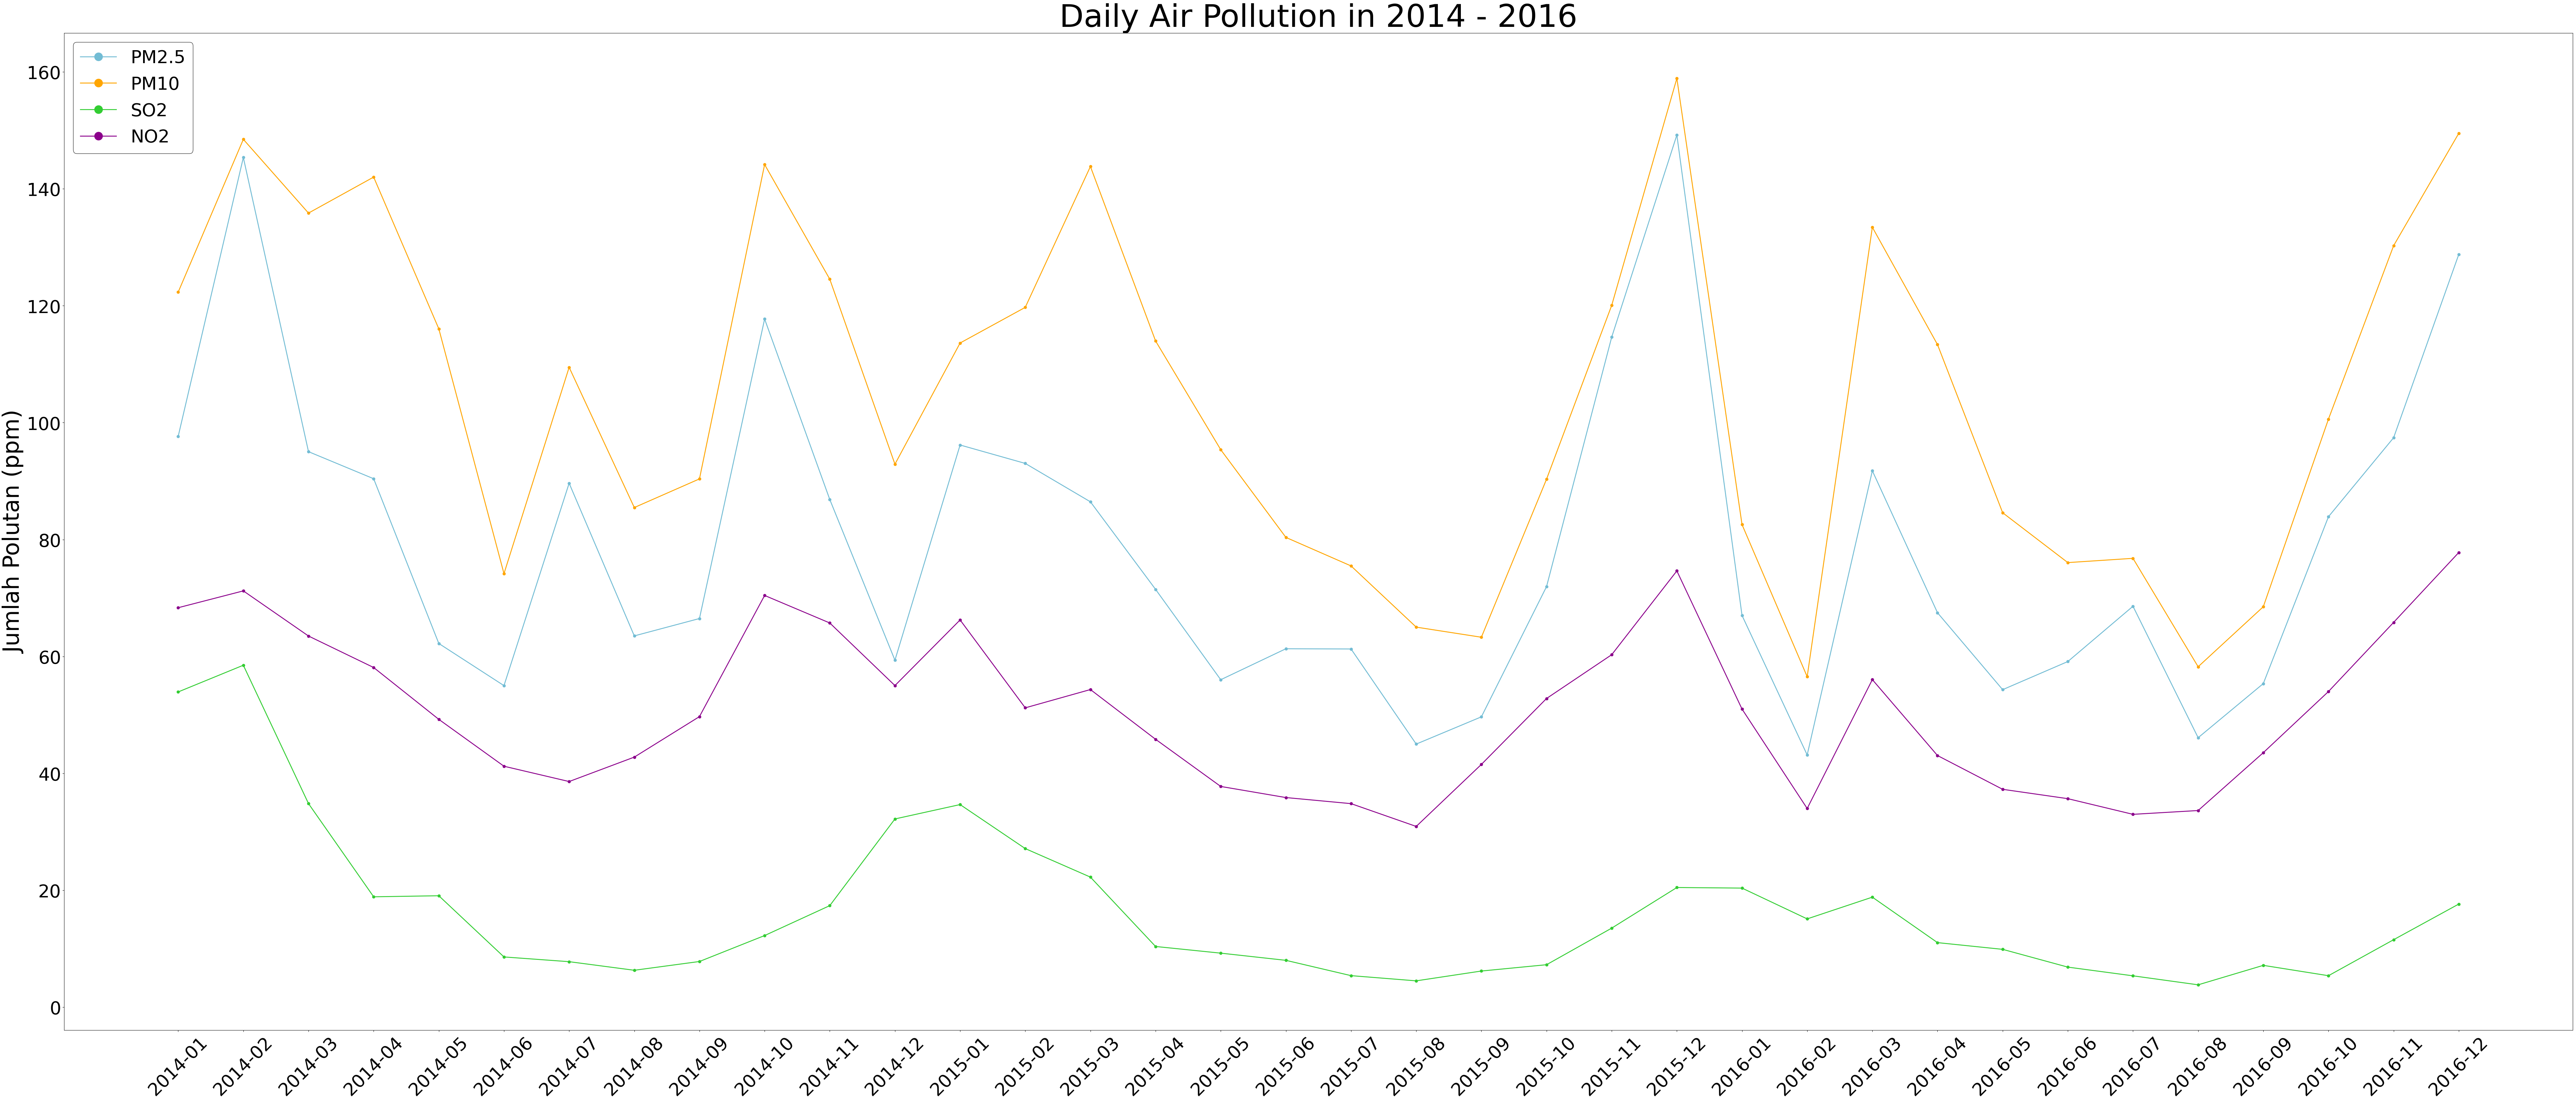

In [362]:
columns_to_plot = ["PM2.5", "PM10", "SO2", "NO2"]

colors = ["#72BCD4", "#FFA500", "#32CD32", "#8B008B"]

plt.figure(figsize=(100, 40))


for j, column in enumerate(columns_to_plot):
  plt.plot(
      viz_monthly_data["datetime"],
      viz_monthly_data[column],
      marker="o",
      linewidth=2,
      color=colors[j],
      label=column
)

plt.title(
    "Daily Air Pollution in 2014 - 2016",
    loc="center",
    fontsize=70
)
plt.xticks(fontsize=40, rotation=45)
plt.yticks(fontsize=40)
plt.ylabel("Jumlah Polutan (ppm)", fontsize=50)
plt.legend(fontsize=40, markerscale=3, edgecolor="black")
plt.show()

### Pertanyaan 2: Wilayah mana yang memiliki udara paling tercemar (terdapat polutan dengan rata-rata tertinggi) sepanjang tahun 2015?

In [363]:
monthly_data_2015 = combined_table[combined_table['datetime'].dt.year == 2015]
monthly_data_2015 = monthly_data_2015.round(decimals=2)
monthly_data_2015 = monthly_data_2015.rename(columns={'PM2.5': "PM2_5"})
monthly_data_2015

,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
16104,16105,2015,1,1,0,3.0,21.0,10.0,16.0,400.0,54.0,-1.0,1027.0,-23.0,0.0,NW,0.9,Wanshouxigong,2015-01-01 00:00:00
16105,16106,2015,1,1,1,3.0,13.0,11.0,17.0,400.0,53.0,0.0,1025.0,-22.9,0.0,NW,2.7,Wanshouxigong,2015-01-01 01:00:00
16106,16107,2015,1,1,2,3.0,13.0,10.0,15.0,400.0,55.0,0.0,1027.0,-22.9,0.0,NW,2.4,Wanshouxigong,2015-01-01 02:00:00
16107,16108,2015,1,1,3,4.0,18.0,13.0,13.0,400.0,57.0,0.0,1028.0,-24.4,0.0,NW,2.4,Wanshouxigong,2015-01-01 03:00:00
16108,16109,2015,1,1,4,4.0,15.0,15.0,12.0,400.0,58.0,0.0,1030.0,-24.4,0.0,NW,2.4,Wanshouxigong,2015-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410563,410564,2015,12,31,19,105.0,117.0,23.0,96.0,2500.0,2.0,-3.4,1024.6,-8.8,0.0,SSW,0.3,Wanliu,2015-12-31 19:00:00
410564,410565,2015,12,31,20,121.0,149.0,28.0,104.0,3600.0,3.0,-3.7,1024.6,-8.8,0.0,SW,0.1,Wanliu,2015-12-31 20:00:00
410565,410566,2015,12,31,21,120.0,135.0,22.0,100.0,3200.0,2.0,-4.5,1024.1,-8.1,0.0,ENE,1.2,Wanliu,2015-12-31 21:00:00
410566,410567,2015,12,31,22,125.0,164.0,33.0,108.0,4200.0,4.0,-1.9,1024.0,-8.2,0.0,NE,1.2,Wanliu,2015-12-31 22:00:00


### Data Bulanan per Station pada Tahun 2015

In [364]:
monthly_data_2015["datetime"] = monthly_data_2015["datetime"].dt.strftime("%Y-%m")
monthly_data_PM2_5 = monthly_data_2015.groupby(by=["datetime", "station"]).PM2_5.mean().reset_index()
monthly_data_PM2_5 = monthly_data_PM2_5.sort_values(by= "datetime", ascending=True)
monthly_data_PM2_5 = monthly_data_PM2_5.round(decimals=2)
monthly_data_PM2_5

,datetime,station,PM2_5
0,2015-01,Aotizhongxin,91.52
11,2015-01,Wanshouxigong,103.56
10,2015-01,Wanliu,97.88
9,2015-01,Tiantan,101.81
7,2015-01,Nongzhanguan,107.62
...,...,...,...
133,2015-12,Changping,120.80
132,2015-12,Aotizhongxin,153.30
142,2015-12,Wanliu,150.36
136,2015-12,Guanyuan,154.24


In [365]:
monthly_data_PM10 = monthly_data_2015.groupby(by=["datetime", "station"]).PM10.mean().reset_index()
monthly_data_PM10 = monthly_data_PM10.sort_values(by= "datetime", ascending=True)
monthly_data_PM10 = monthly_data_PM10.round(decimals=2)
monthly_data_PM10

,datetime,station,PM10
0,2015-01,Aotizhongxin,114.66
11,2015-01,Wanshouxigong,128.38
10,2015-01,Wanliu,126.10
9,2015-01,Tiantan,115.28
7,2015-01,Nongzhanguan,130.84
...,...,...,...
133,2015-12,Changping,146.95
132,2015-12,Aotizhongxin,165.52
142,2015-12,Wanliu,156.95
136,2015-12,Guanyuan,165.72


In [366]:
monthly_data_NO2 = monthly_data_2015.groupby(by=["datetime", "station"]).NO2.mean().reset_index()
monthly_data_NO2 = monthly_data_NO2.sort_values(by= "datetime", ascending=True)
monthly_data_NO2 = monthly_data_NO2.round(decimals=2)
monthly_data_NO2

,datetime,station,NO2
0,2015-01,Aotizhongxin,69.18
11,2015-01,Wanshouxigong,76.76
10,2015-01,Wanliu,77.35
9,2015-01,Tiantan,68.67
7,2015-01,Nongzhanguan,76.99
...,...,...,...
133,2015-12,Changping,76.96
132,2015-12,Aotizhongxin,89.73
142,2015-12,Wanliu,80.14
136,2015-12,Guanyuan,83.65


In [367]:
monthly_data_SO2 = monthly_data_2015.groupby(by=["datetime", "station"]).SO2.mean().reset_index()
monthly_data_SO2 = monthly_data_SO2.sort_values(by= "datetime", ascending=True)
monthly_data_SO2 = monthly_data_SO2.round(decimals=2)
monthly_data_SO2

,datetime,station,SO2
0,2015-01,Aotizhongxin,38.16
11,2015-01,Wanshouxigong,38.57
10,2015-01,Wanliu,39.51
9,2015-01,Tiantan,29.40
7,2015-01,Nongzhanguan,42.63
...,...,...,...
133,2015-12,Changping,15.02
132,2015-12,Aotizhongxin,24.51
142,2015-12,Wanliu,25.99
136,2015-12,Guanyuan,23.32


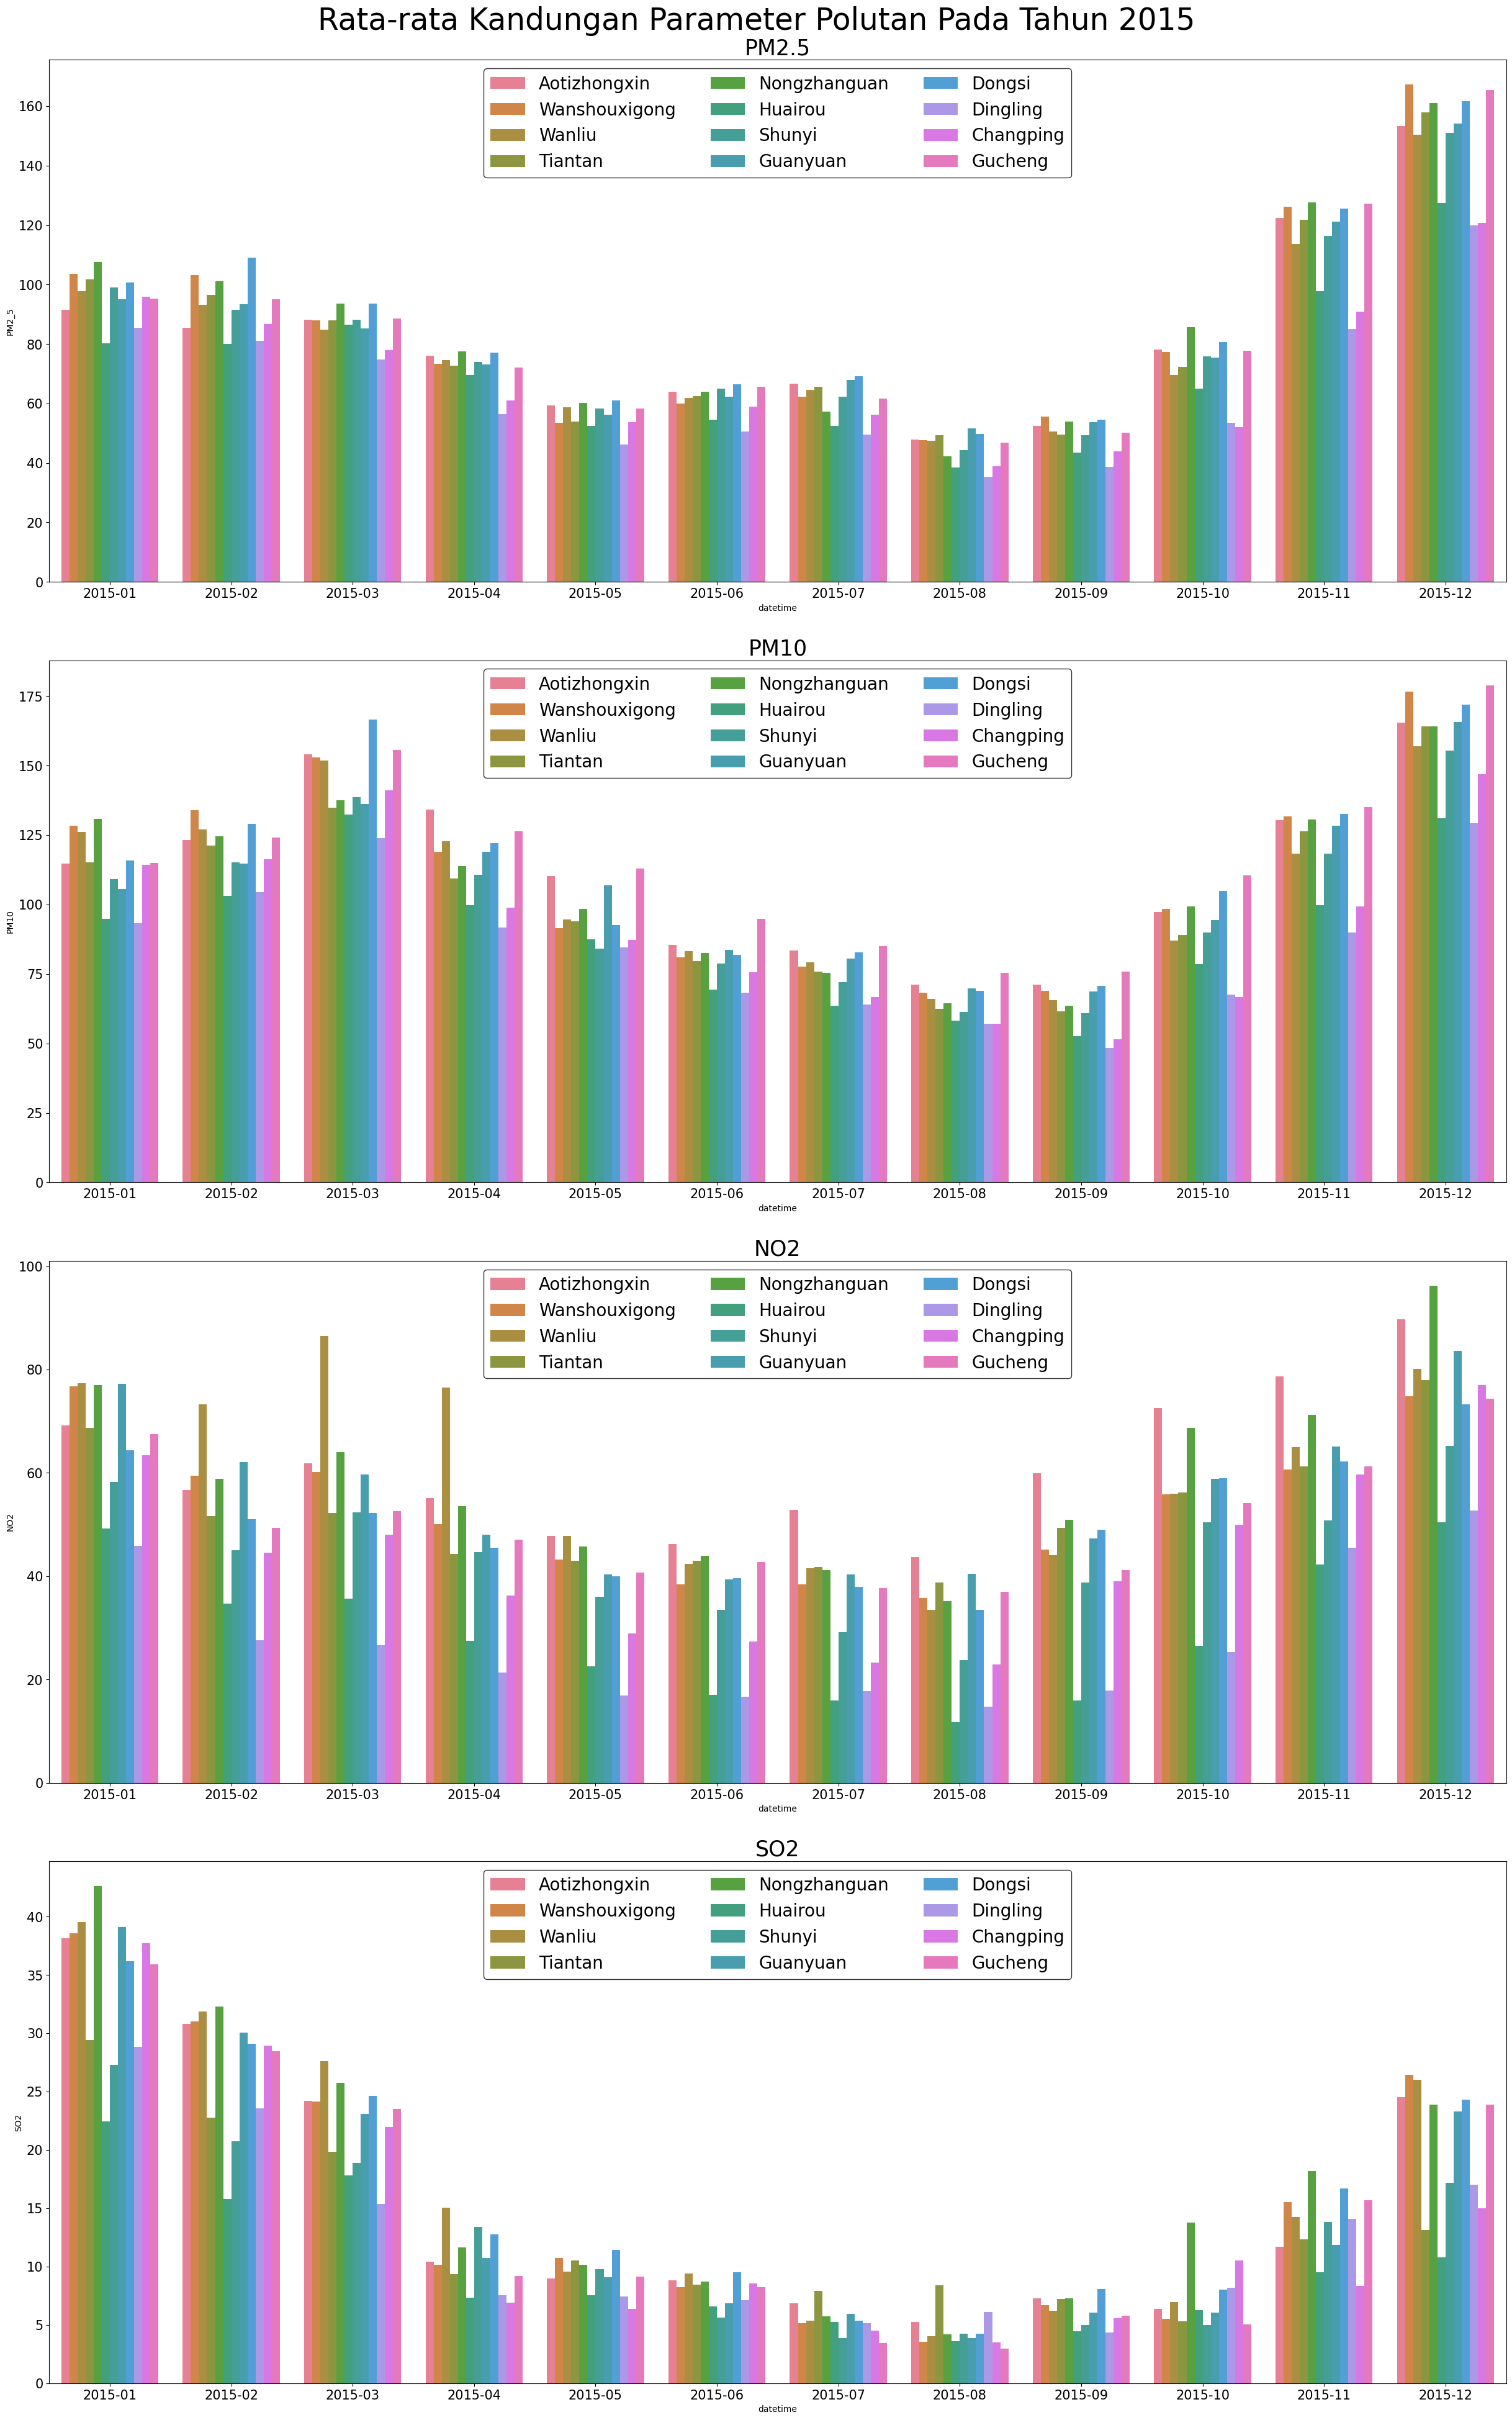

In [368]:
plt.figure(figsize=(25, 40))

# Plot PM2.5
plt.subplot(4, 1, 1)
sns.barplot(data=monthly_data_PM2_5, x='datetime', y='PM2_5', hue='station')
plt.title('PM2.5', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fontsize=20, edgecolor='black')

# Plot PM10
plt.subplot(4, 1, 2)
sns.barplot(data=monthly_data_PM10, x='datetime', y='PM10', hue='station')
plt.title('PM10', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fontsize=20, edgecolor='black')

# Plot NO2
plt.subplot(4, 1, 3)
sns.barplot(data=monthly_data_NO2, x='datetime', y='NO2', hue='station')
plt.title('NO2', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fontsize=20, edgecolor='black')

# Plot SO2
plt.subplot(4, 1, 4)
sns.barplot(data=monthly_data_SO2, x='datetime', y='SO2', hue='station')
plt.title('SO2', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fontsize=20, edgecolor='black')

plt.suptitle('Rata-rata Kandungan Parameter Polutan Pada Tahun 2015', fontsize=35)

plt.tight_layout(pad=3)
plt.show()

### Insight:
- Rata-rata kandungan PM2.5 tertinggi berada di Dongsi, Nongzhanguan, dan Wanshouxigong
- Rata-rata kandungan PM10 tertinggi berada di Dongsi, Gucheng, dan Wanshouxigong
- Rata-rata kandungan NO2 tertinggi berada di Aotizhongxin dan Wanliu
- Rata-rata kandungan SO2 tertinggi berada di Nongzhanguan pada bulan Jan-Feb, Wanliu pada bulan Mar-Apr, Dongsi pada bulan Mei-Jun, Tiantian pada bulan Jul-Ags, Nongzhanguan pada bulan Okt-Nov



### Analisis Level Polutan

In [369]:
"""
Berikut adalah kategorisasi berdasarkan data dari AirVisual:

Particulate Matter:
Baik: Kurang dari 12 µg/m³.
Sedang: Antara 13-35 µg/m³.
Tidak Sehat: Antara 56-150 µg/m³ 1.

Nitrogen Dioxide (NO2):
Konsentrasi NO2 yang baik adalah kurang dari 40 µg/m³.
Tingkat sedang berada antara 41-100 µg/m³, dan tingkat tidak sehat di atas 100 µg/m³ 2.

Sulfur Dioxide (SO2):
Konsentrasi SO2 yang baik adalah kurang dari 20 µg/m³.
Tingkat sedang berada antara 21-50 µg/m³, dan tingkat tidak sehat di atas 50 µg/m³

"""

'\nBerikut adalah kategorisasi berdasarkan data dari AirVisual:\n\nParticulate Matter: \nBaik: Kurang dari 12 µg/m³.\nSedang: Antara 13-35 µg/m³.\nTidak Sehat: Antara 56-150 µg/m³ 1.\n\nNitrogen Dioxide (NO2): \nKonsentrasi NO2 yang baik adalah kurang dari 40 µg/m³. \nTingkat sedang berada antara 41-100 µg/m³, dan tingkat tidak sehat di atas 100 µg/m³ 2.\n\nSulfur Dioxide (SO2): \nKonsentrasi SO2 yang baik adalah kurang dari 20 µg/m³. \nTingkat sedang berada antara 21-50 µg/m³, dan tingkat tidak sehat di atas 50 µg/m³\n\n'

In [370]:
# Menghitung tingkat polusi rata-rata untuk setiap stasiun
average_pollution_level = monthly_data_PM2_5.groupby('station')['PM2_5'].mean()

# Kolom tingkat polusi rata-rata
PM2_5_level = pd.concat([average_pollution_level], axis=1)
PM2_5_level.columns = ['Rata-rata Polutan (ppm)']

# Kategorisasi stasiun berdasarkan frekuensi dan tingkat polusi rata-rata
def categorize(row):
    if row['Rata-rata Polutan (ppm)'] >= 150:
        return 'Berbahaya'
    elif row['Rata-rata Polutan (ppm)'] >= 35:
        return 'Tidak Sehat'
    elif row['Rata-rata Polutan (ppm)'] >= 12:
        return 'Sedang'
    else:
        return 'Baik'

PM2_5_level['Category'] = PM2_5_level.apply(categorize, axis=1)
PM2_5_level = PM2_5_level.round(decimals=2)
PM2_5_level

,Rata-rata Polutan (ppm),Category
station,,
Aotizhongxin,82.12,Tidak Sehat
Changping,69.74,Tidak Sehat
Dingling,64.68,Tidak Sehat
Dongsi,87.43,Tidak Sehat
Guanyuan,82.45,Tidak Sehat
Gucheng,83.67,Tidak Sehat
Huairou,70.67,Tidak Sehat
Nongzhanguan,86.00,Tidak Sehat
Shunyi,81.28,Tidak Sehat


In [371]:
# Menghitung tingkat polusi rata-rata untuk setiap stasiun
average_pollution_level = monthly_data_PM10.groupby('station')['PM10'].mean()

# Kolom tingkat polusi rata-rata
PM10_level = pd.concat([average_pollution_level], axis=1)
PM10_level.columns = ['Rata-rata Polutan (ppm)']

# Kategorisasi stasiun berdasarkan frekuensi dan tingkat polusi rata-rata
def categorize(row):
    if row['Rata-rata Polutan (ppm)'] >= 150:
        return 'Berbahaya'
    elif row['Rata-rata Polutan (ppm)'] >= 35:
        return 'Tidak Sehat'
    elif row['Rata-rata Polutan (ppm)'] >= 12:
        return 'Sedang'
    else:
        return 'Baik'

PM10_level['Category'] = PM10_level.apply(categorize, axis=1)
PM10_level = PM10_level.round(decimals=2)
PM10_level

,Rata-rata Polutan (ppm),Category
station,,
Aotizhongxin,111.75,Tidak Sehat
Changping,93.48,Tidak Sehat
Dingling,85.20,Tidak Sehat
Dongsi,111.66,Tidak Sehat
Guanyuan,106.12,Tidak Sehat
Gucheng,115.81,Tidak Sehat
Huairou,89.23,Tidak Sehat
Nongzhanguan,107.11,Tidak Sehat
Shunyi,99.52,Tidak Sehat


In [372]:
# Menghitung tingkat polusi rata-rata untuk setiap stasiun
average_pollution_level = monthly_data_NO2.groupby('station')['NO2'].mean()

# Kolom tingkat polusi rata-rata
NO2_level = pd.concat([average_pollution_level], axis=1)
NO2_level.columns = ['Rata-rata Polutan (ppm)']

# Kategorisasi stasiun berdasarkan frekuensi dan tingkat polusi rata-rata
def categorize(row):
    if row['Rata-rata Polutan (ppm)'] >= 100:
        return 'Tidak Sehat'
    elif row['Rata-rata Polutan (ppm)'] >= 40:
        return 'Sedang'
    else:
        return 'Baik'

NO2_level['Category'] = NO2_level.apply(categorize, axis=1)
NO2_level = NO2_level.round(decimals=2)
NO2_level

,Rata-rata Polutan (ppm),Category
station,,
Aotizhongxin,61.20,Sedang
Changping,43.36,Sedang
Dingling,27.41,Baik
Dongsi,50.65,Sedang
Guanyuan,55.20,Sedang
Gucheng,50.48,Sedang
Huairou,29.11,Baik
Nongzhanguan,58.90,Sedang
Shunyi,43.98,Sedang


In [373]:
# Menghitung tingkat polusi rata-rata untuk setiap stasiun
average_pollution_level = monthly_data_SO2.groupby('station')['SO2'].mean()

# Kolom tingkat polusi rata-rata
SO2_level = pd.concat([average_pollution_level], axis=1)
SO2_level.columns = ['Rata-rata Polutan (ppm)']

# Kategorisasi stasiun berdasarkan frekuensi dan tingkat polusi rata-rata
def categorize(row):
    if row['Rata-rata Polutan (ppm)'] >= 50:
        return 'Tidak Sehat'
    elif row['Rata-rata Polutan (ppm)'] >= 20:
        return 'Sedang'
    else:
        return 'Baik'

SO2_level['Category'] = SO2_level.apply(categorize, axis=1)
SO2_level = SO2_level.round(decimals=2)
SO2_level

,Rata-rata Polutan (ppm),Category
station,,
Aotizhongxin,15.28,Baik
Changping,13.16,Baik
Dingling,12.07,Baik
Dongsi,15.85,Baik
Guanyuan,14.67,Baik
Gucheng,14.28,Baik
Huairou,9.78,Baik
Nongzhanguan,17.02,Baik
Shunyi,12.07,Baik


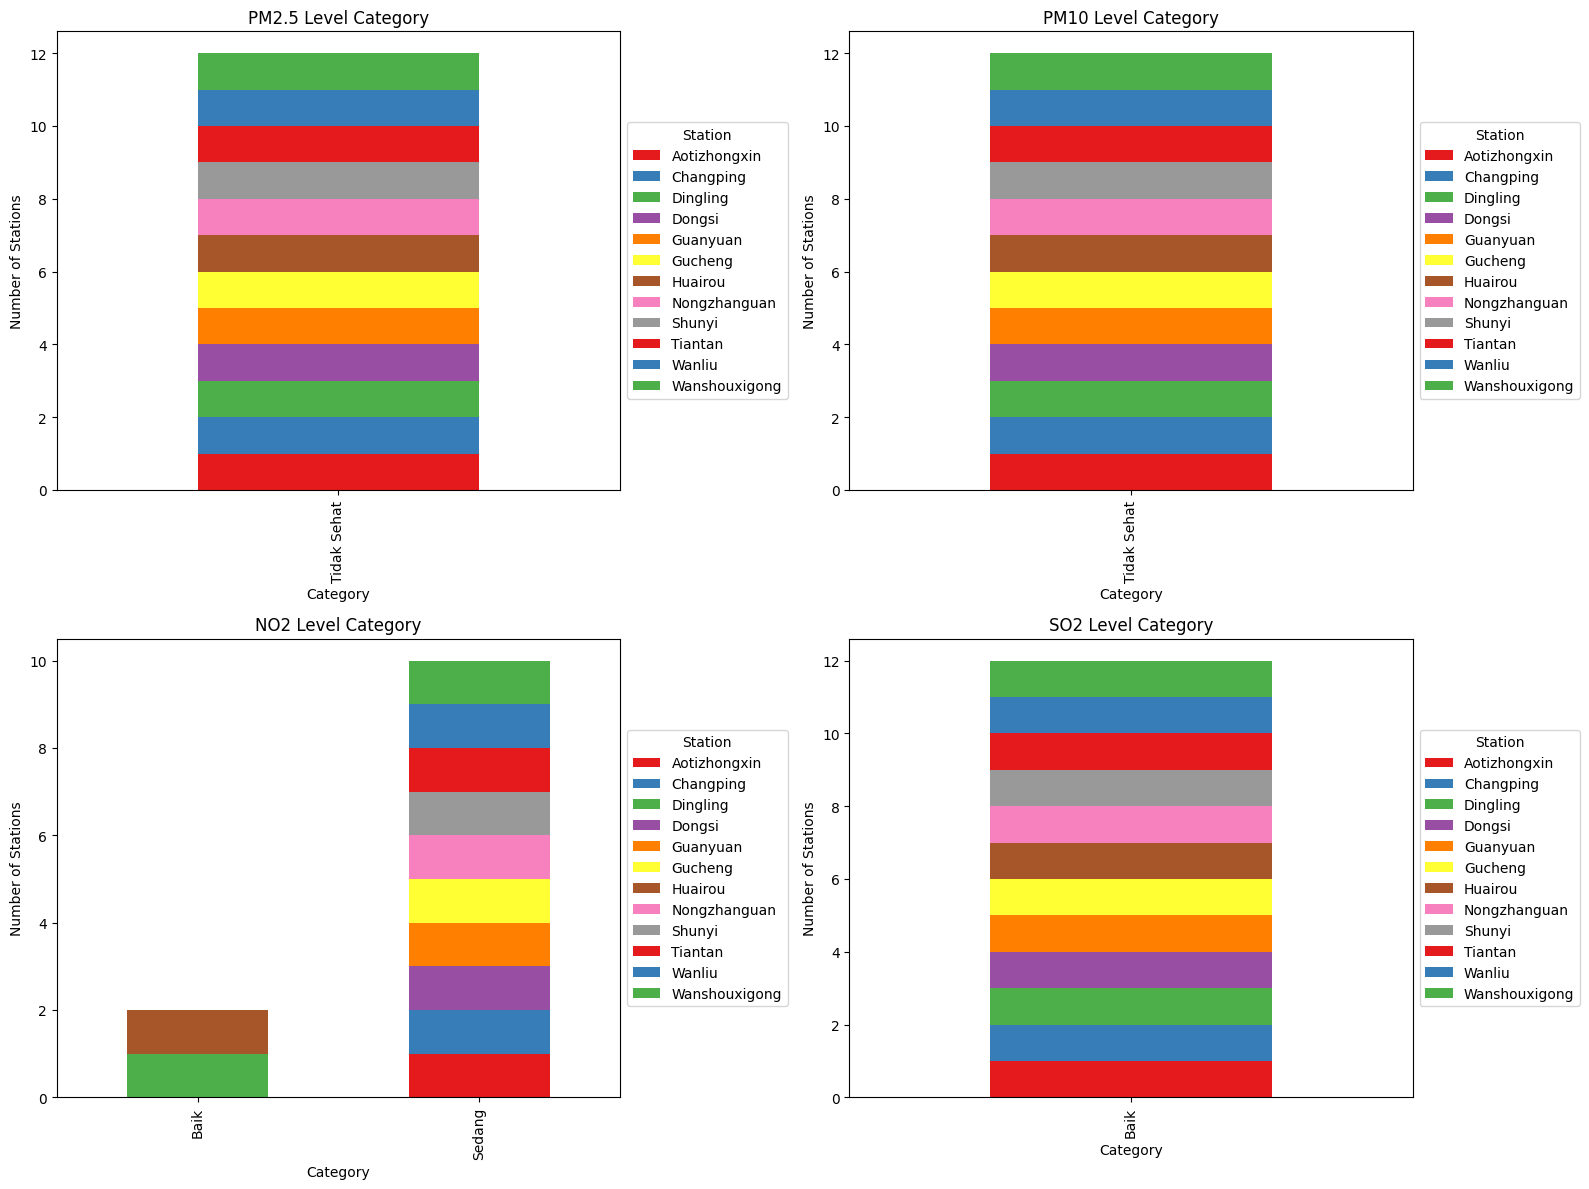

In [374]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot PM2.5 level
category_station_counts = PM2_5_level.groupby(['Category', 'station']).size().unstack()
ax = category_station_counts.plot(kind='bar', stacked=True, color=sns.color_palette('Set1', len(category_station_counts.columns)), ax=axes[0, 0])
ax.set_title('PM2.5 Level Category')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Stations')
ax.legend(title='Station', loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')

# Plot PM10 level
category_station_counts = PM10_level.groupby(['Category', 'station']).size().unstack()
ax = category_station_counts.plot(kind='bar', stacked=True, color=sns.color_palette('Set1', len(category_station_counts.columns)), ax=axes[0, 1])
ax.set_title('PM10 Level Category')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Stations')
ax.legend(title='Station', loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')

# Plot NO2 level
category_station_counts = NO2_level.groupby(['Category', 'station']).size().unstack()
ax = category_station_counts.plot(kind='bar', stacked=True, color=sns.color_palette('Set1', len(category_station_counts.columns)), ax=axes[1, 0])
ax.set_title('NO2 Level Category')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Stations')
ax.legend(title='Station', loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')

# Plot SO2 level
category_station_counts = SO2_level.groupby(['Category', 'station']).size().unstack()
ax = category_station_counts.plot(kind='bar', stacked=True, color=sns.color_palette('Set1', len(category_station_counts.columns)), ax=axes[1, 1])
ax.set_title('SO2 Level Category')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Stations')
ax.legend(title='Station', loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')

plt.tight_layout()

plt.show()

### Insight
- Level polutan PM2.5 dan PM10 cenderung tidak sehat di semua wilayah
- Level polutan NO2 cenderung sedang di 10 wilayah dan baik di 2 wilayah yaitu di Huairou dan Wanshouxigong
- Level polutan SO2 cenderung baik di semua wilayah

## Conclusion

1. Bagaimana Trend Kondisi Kualitas Udara Beberapa Wilayah di China Pada Tahun 2014 - 2016?
- Jawab:
  Berdasarkan rata-rata konsentrasi bulanan setiap parameter mengalami trend yang fluktuatif dan memiliki pola yang mirip di mana konsentrasinya tinggi di awal, kemudian menurun hingga bulan Agustus, lalu naik kembali hingga akhir tahun.


2. Wilayah mana yang memiliki udara paling tercemar (terdapat polutan dengan rata-rata tertinggi) sepanjang tahun 2015?
- Jawab:
  
  Berdasarkan rata-rata kandungan semua polutan wilayah dengan konsentrasi polutan tertinggi antara lain Dongsi dan Nozhanguan.